**IMPORT DATA**

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv('/content/Churn_Modelling.csv')

In [69]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**DATA PREPROCESSING**

AS THERE ARE NO NULL VALUES WE ARE NOT GOING TO HANDLE THE MISSING DATA

In [71]:
X = data.iloc[:,3:-1]
y =data.iloc[:,-1]
print(X)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           

In [72]:
y.value_counts()

,count
Exited,
0,7963
1,2037


CHECKING FOR OUTLIERS

In [73]:
continous_columns = data.select_dtypes(include=["float64","int64"]).columns

In [74]:
len(continous_columns)

11

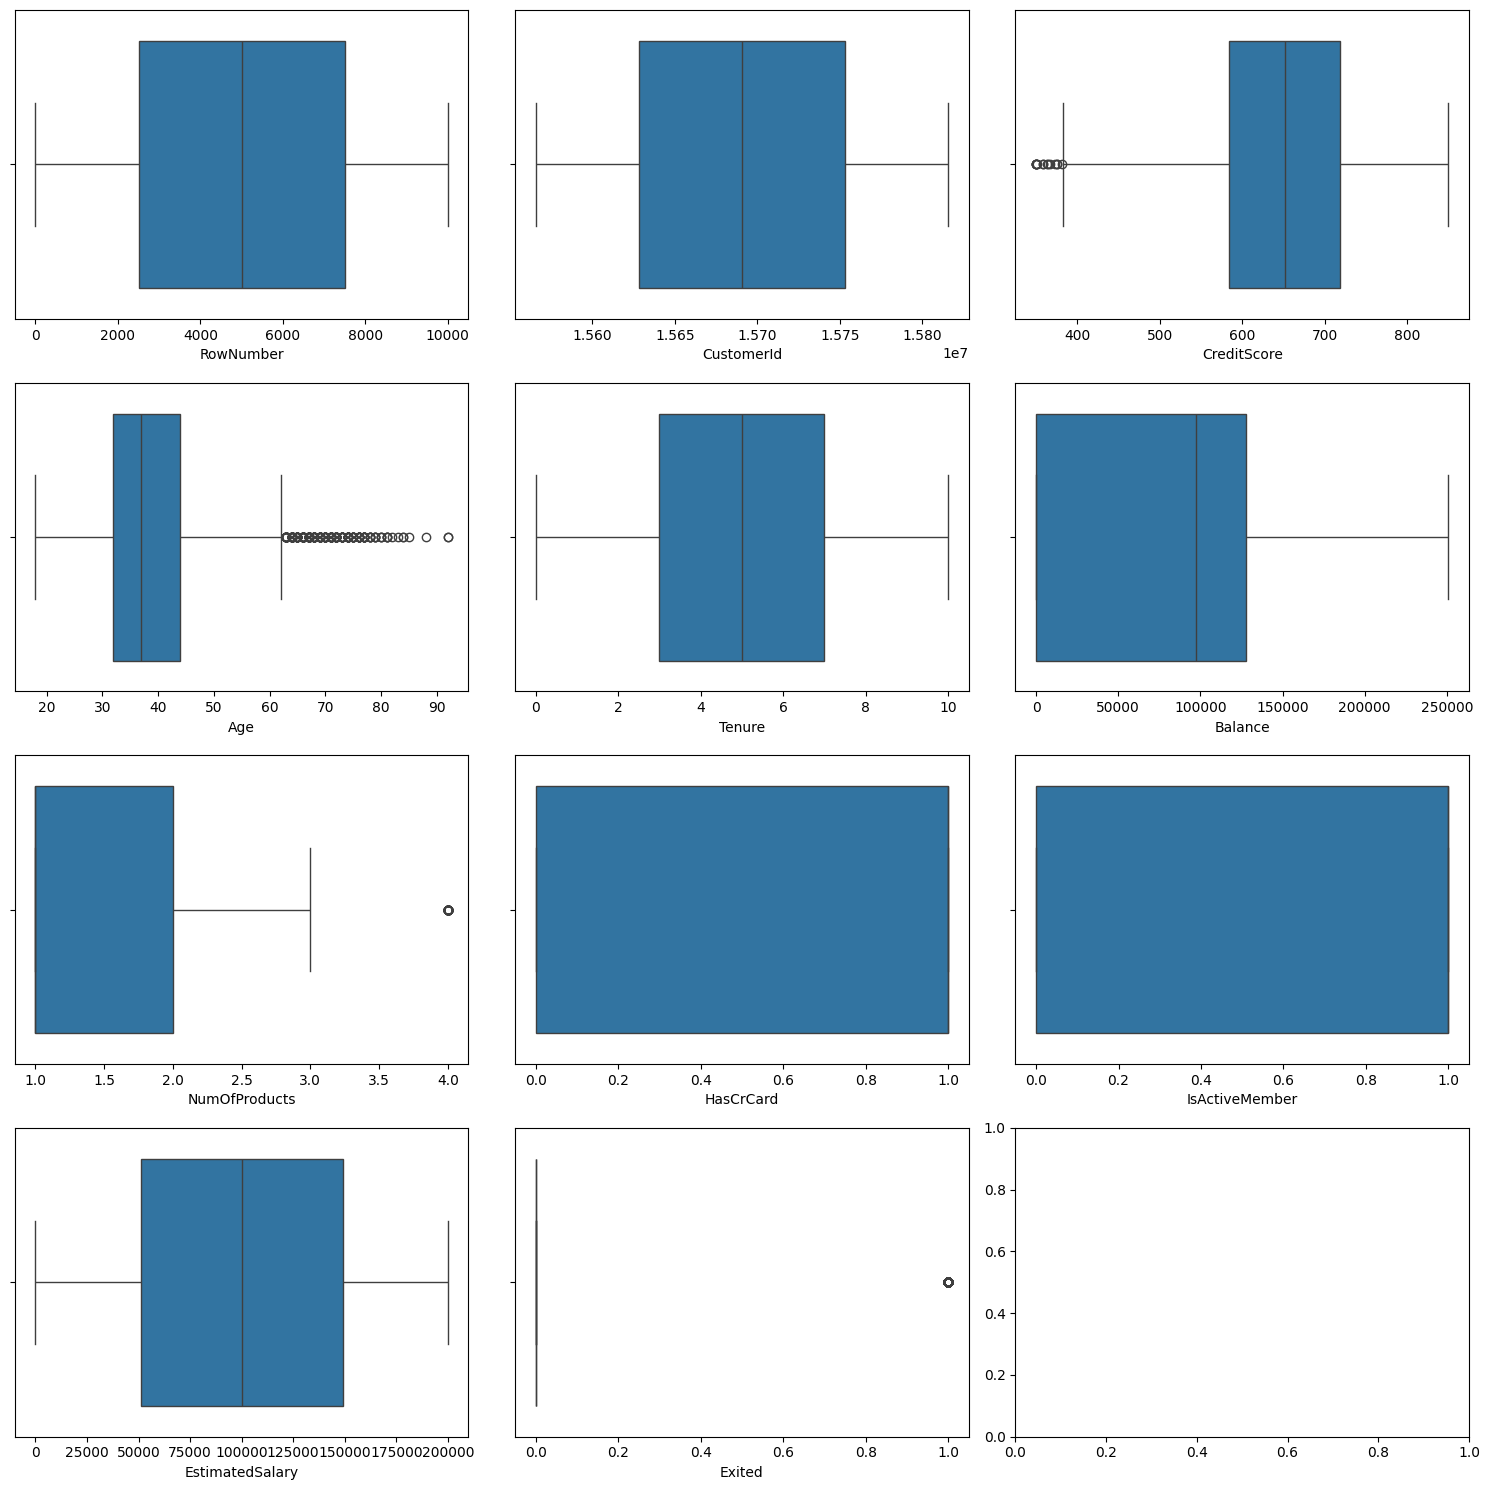

In [75]:
fig,axes=plt.subplots(4,3,figsize=(15,15))

for i,column in enumerate(continous_columns):
  sns.boxplot(x=data[column],ax=axes[i//3,i%3])
plt.tight_layout()
plt.show()

In [76]:
X.drop(columns=["Age"],inplace=True)

IQR METHOD

In [77]:

Q1 = np.percentile(X['CreditScore'], 25)
Q3 = np.percentile(X['CreditScore'], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
check =(X['CreditScore'] >= lower_bound) & (X['CreditScore'] <= upper_bound)
X= X[check]
y=y[check]
X.reset_index(drop=True,inplace=True)
y.reset_index(drop=True,inplace=True)

HEAT MAP

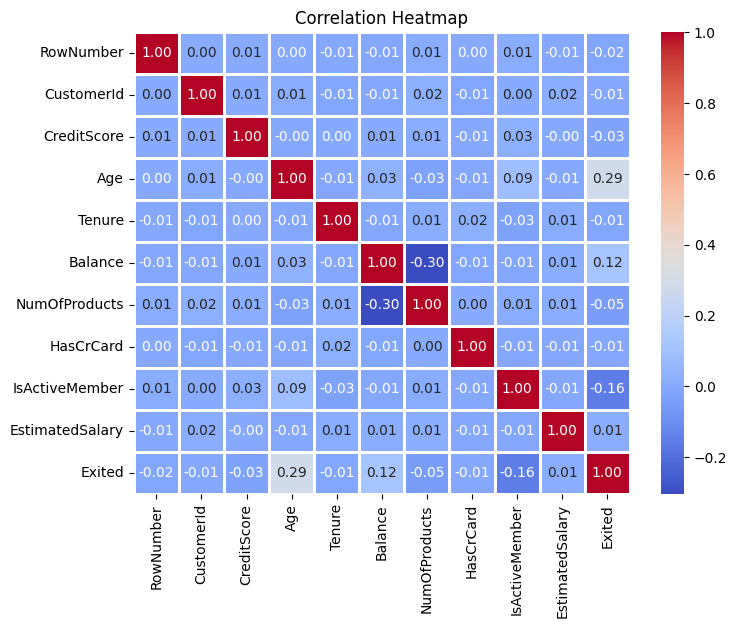

In [102]:
corr_matrix = data[continous_columns].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [78]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9985 entries, 0 to 9984
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9985 non-null   int64  
 1   Geography        9985 non-null   object 
 2   Gender           9985 non-null   object 
 3   Tenure           9985 non-null   int64  
 4   Balance          9985 non-null   float64
 5   NumOfProducts    9985 non-null   int64  
 6   HasCrCard        9985 non-null   int64  
 7   IsActiveMember   9985 non-null   int64  
 8   EstimatedSalary  9985 non-null   float64
dtypes: float64(2), int64(5), object(2)
memory usage: 702.2+ KB


ENCODING

In [79]:
from sklearn.preprocessing import OneHotEncoder
hot_encoder = OneHotEncoder()

In [80]:

# encoded_columns = hot_encoder.fit_transform(X[["Gender"]])

# encoded_data = pd.DataFrame(encoded_columns.toarray(), columns=hot_encoder.get_feature_names_out(['Gender']))
# X = pd.concat([X.drop(columns=['Gender']), encoded_data], axis=1)

In [81]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X["Gender"] = encoder.fit_transform(X["Gender"])

In [82]:
encoded_columns=hot_encoder.fit_transform(X[['Geography']])
encoded_data=pd.DataFrame(encoded_columns.toarray(),columns=hot_encoder.get_feature_names_out(['Geography']))
X=pd.concat([X.drop(columns=['Geography']),encoded_data],axis=1)

In [83]:
X.head()

,CreditScore,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0


In [84]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [85]:
y.value_counts()

,count
Exited,
0,7963
1,2022


SPLITTING DATA INTO TRAINING AND TESTING

In [86]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9985 entries, 0 to 9984
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9985 non-null   int64  
 1   Gender             9985 non-null   int64  
 2   Tenure             9985 non-null   int64  
 3   Balance            9985 non-null   float64
 4   NumOfProducts      9985 non-null   int64  
 5   HasCrCard          9985 non-null   int64  
 6   IsActiveMember     9985 non-null   int64  
 7   EstimatedSalary    9985 non-null   float64
 8   Geography_France   9985 non-null   float64
 9   Geography_Germany  9985 non-null   float64
 10  Geography_Spain    9985 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 858.2 KB


In [87]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 9985 entries, 0 to 9984
Series name: Exited
Non-Null Count  Dtype
--------------  -----
9985 non-null   int64
dtypes: int64(1)
memory usage: 78.1 KB


In [88]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


SCALING

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

MODEL

In [90]:
# !pip install keras
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import HeNormal

model = Sequential()
model.add(Dense(units=7,activation='relu',input_dim=11, kernel_initializer=HeNormal()))
model.add(Dense(units=7,activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(units=1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [91]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [97]:
model.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8382 - loss: 0.3782
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8356 - loss: 0.3762
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8358 - loss: 0.3679
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8396 - loss: 0.3627
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8379 - loss: 0.3677
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8397 - loss: 0.3729
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8419 - loss: 0.3701
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8342 - loss: 0.3774
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8422 - loss: 0.3706
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8455 - loss: 0.3679
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8365 - loss: 0.3767
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [98]:
y_predict = model.predict(X_test)
y_predict =(y_predict>0.5)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [100]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

print("accuracy_score is: ",accuracy_score(y_test,y_predict))
print("precison_score is: ",precision_score(y_test,y_predict))



accuracy_score is:  0.8107160741111668
precison_score is:  0.630901287553648
